<h1><strong><u>Naive Bayes Model Test</u></strong></h1>

In [30]:
%%capture
%run DataPrep.ipynb

<h2><strong><u>Naive Bayes Model Selection</u></strong></h2>

<h3><strong><u>Validation Curves</u></strong></h3>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ...................................clf__alpha=0.001; total time=   0.0s[CV] END ......................................clf__alpha=10; total time=   0.0s

[CV] END .....................................clf__alpha=0.1; total time=   0.0s
[CV] END ..................................clf__alpha=0.0001; total time=   0.0s
[CV] END .......................................clf__alpha=1; total time=   0.0s
[CV] END ....................................clf__alpha=0.01; total time=   0.0s
[CV] END ...................................clf__alpha=0.001; total time=   0.0s
[CV] END ..................................clf__alpha=0.0001; total time=   0.0s
[CV] END .....................................clf__alpha=0.1; total time=   0.0s
[CV] END ....................................clf__alpha=0.01; total time=   0.0s
[CV] END .......................................clf__alpha=1; total time=   0.0s
[CV] END ..................................clf__alpha=0.0001; total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    2.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.4s finished


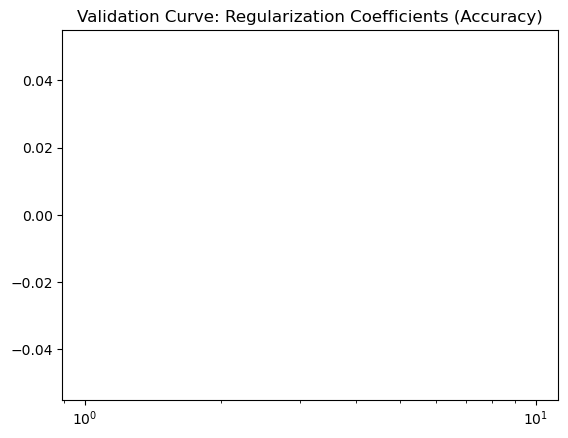

Exception ignored in: <function ResourceTracker.__del__ at 0x1046d9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102dc9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102b19bc0>
Traceback (most recent call last

In [ ]:
pipeline = Pipeline(
    [
        ("scale", StandardScaler()),
        ("clf", MultinomialNB())
    ]
)
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__alpha",
                                                   param_range=alphas,
                                                   verbose=2,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Validation Curve: Regularization Coefficients (Accuracy)")
plt.semilogx(alphas, train_scores_mean)
plt.semilogx(alphas, validation_scores_mean)

<h3><strong><u>Cross-Validation Test</u></strong></h3>

<h4><strong><u>Findings From 'Model Selection' Section</u></strong></h4>
Gaussian takes no parameters.

<h2><strong><u>Model Evaluation</u></strong></h2>

<h3><strong><u>Learning Curve Tests</u></strong></h3>

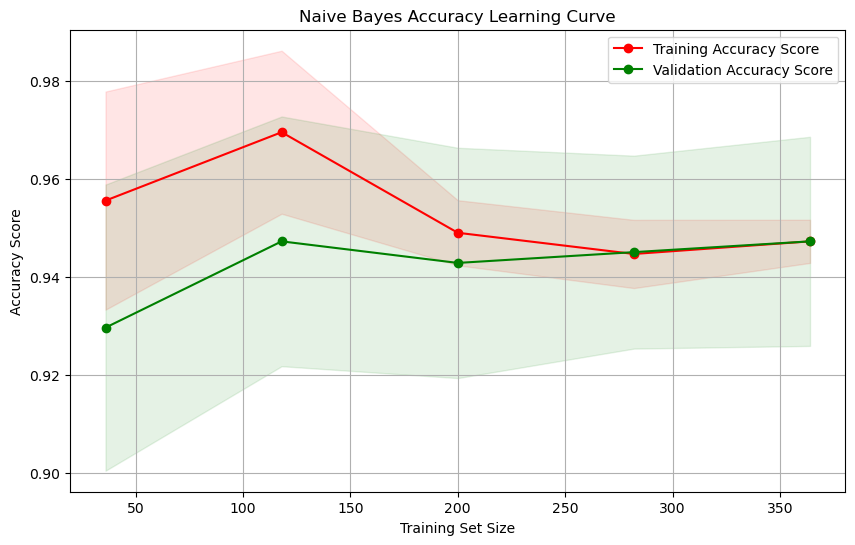

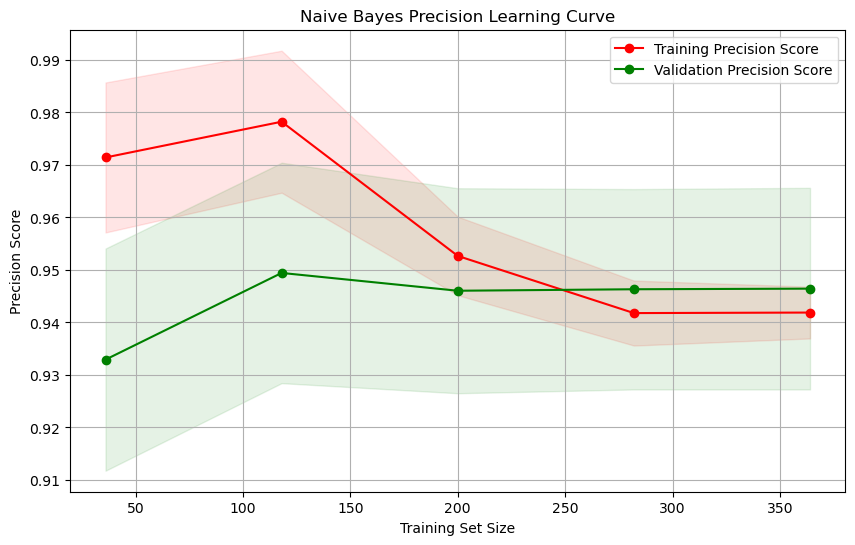

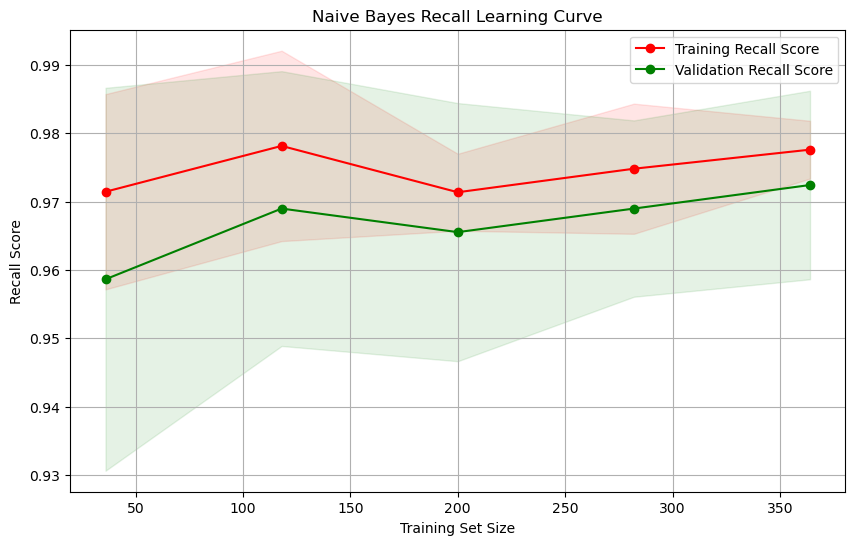

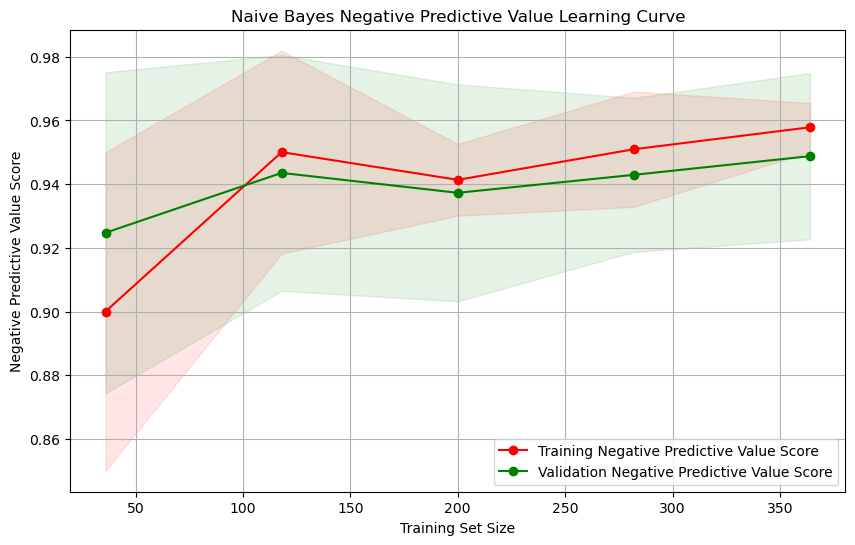

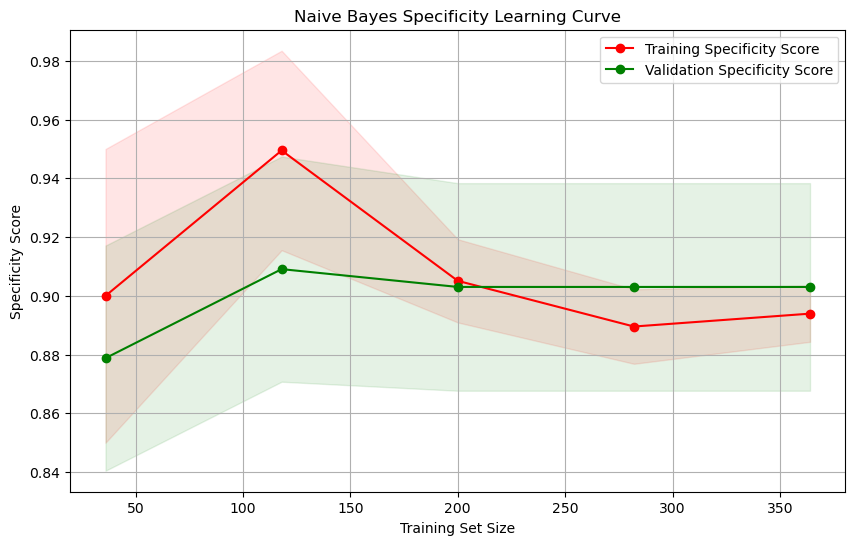

In [21]:
for key, value in clf_metrics.items():
    nb_train_sizes, nb_train_scores, nb_validation_scores = learning_curve(
        nb_model,
        X_train,
        y_train,
        cv=5,  # Number of folds for cross-validation
        scoring=value,  # Metric to evaluate the model
        n_jobs=-1,  # Use all available CPU cores
    )

    # Calculate mean and standard deviation for scores
    nb_train_scores_mean = np.mean(nb_train_scores, axis=1)
    nb_train_scores_std = np.std(nb_train_scores, axis=1)
    nb_validation_scores_mean = np.mean(nb_validation_scores, axis=1)
    nb_validation_scores_std = np.std(nb_validation_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.title(f"Naive Bayes {key} Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel(f"{key} Score")
    plt.grid()

    plt.fill_between(nb_train_sizes, nb_train_scores_mean - nb_train_scores_std,
                    nb_train_scores_mean + nb_train_scores_std, alpha=0.1,
                    color="r")
    plt.fill_between(nb_train_sizes, nb_validation_scores_mean - nb_validation_scores_std,
                    nb_validation_scores_mean + nb_validation_scores_std, alpha=0.1,
                    color="g")
    plt.plot(nb_train_sizes, nb_train_scores_mean, 'o-', color="r",
                label=f"Training {key} Score")
    plt.plot(nb_train_sizes, nb_validation_scores_mean, 'o-', color="g",
                label=f"Validation {key} Score")

    plt.legend(loc="best")
    plt.show()

<h3><strong><u>Evaluation Metrics</u></strong></h3>

In [22]:
for key, value in clf_metrics.items():
    print(f"{key}")
    nb_training_values = cross_val_score(nb_model, X_train, y=y_train, scoring=value, cv=5)
    print("CV Training Scores: ", nb_training_values)
    np_nb_training_values = np.array(nb_training_values)
    average = np.mean(np_nb_training_values)
    stDev = np.std(np_nb_training_values)
    print(f"Training Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV Training Scores:  [0.93406593 0.96703297 0.91208791 0.95604396 0.96703297]
Training Average and Standard Error:  0.95% ± 2.13% 

Precision
CV Training Scores:  [0.93333333 0.96610169 0.91666667 0.95       0.96610169]
Training Average and Standard Error:  0.95% ± 1.92% 

Recall
CV Training Scores:  [0.96551724 0.98275862 0.94827586 0.98275862 0.98275862]
Training Average and Standard Error:  0.97% ± 1.38% 

Negative Predictive Value
CV Training Scores:  [0.93548387 0.96875    0.90322581 0.96774194 0.96875   ]
Training Average and Standard Error:  0.95% ± 2.61% 

Specificity
CV Training Scores:  [0.87878788 0.93939394 0.84848485 0.90909091 0.93939394]
Training Average and Standard Error:  0.90% ± 3.53% 



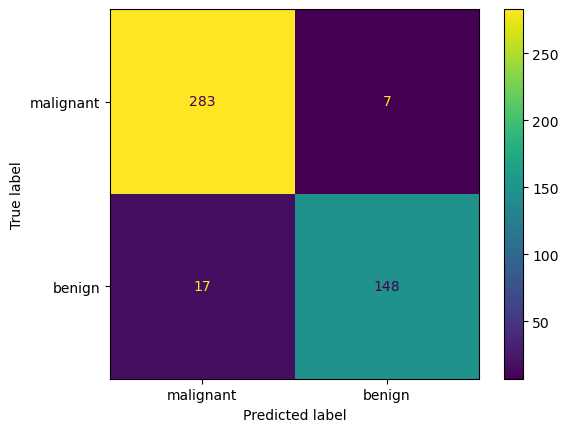

In [23]:
#Training Confusion Matrix
ConfusionMatrixDisplay.from_estimator(nb_model, X_train, y_train, labels=['malignant', 'benign'])

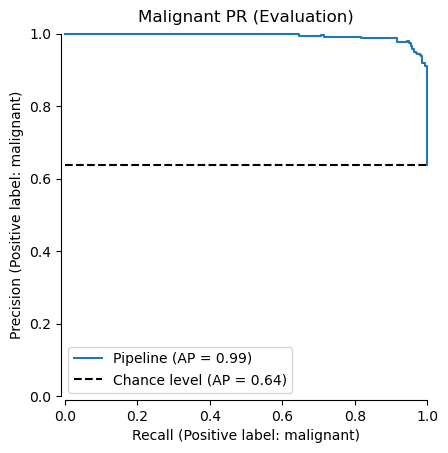

In [24]:
disp = PrecisionRecallDisplay.from_estimator(nb_model, X_train, y_train, pos_label="malignant", plot_chance_level=True, despine=True)
disp.ax_.set_title("Malignant PR (Evaluation)")
plt.show()

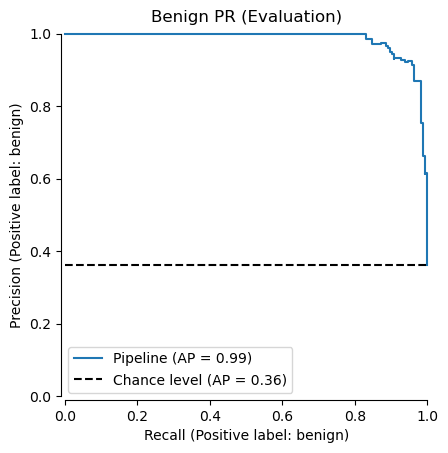

In [25]:
disp = PrecisionRecallDisplay.from_estimator(nb_model, X_train, y_train, pos_label="benign", plot_chance_level=True, despine=True)
disp.ax_.set_title("Benign PR (Evaluation)")
plt.show()

<h4><strong><u>Findings From 'Model Evaluation' Phase</u></strong></h4>
Scaled nor non-scaled data helped the Guassian model perform good enough for consideration in the final model test.

<h2><strong><u>Model Testing</u></strong></h2>

<h3><strong><u>Performance Metrics</u></strong></h3>

In [26]:
# for key, value in clf_metrics.items():
#     print(f"{key}")
#     log_test_values = cross_val_score(nb_model, X_test, y_test, scoring=value, cv=5)
#     print(f"CV test Scores: ", log_test_values)
#     np_log_test_values = np.array(log_test_values)
#     average = np.mean(np_log_test_values)
#     stDev = np.std(np_log_test_values)
#     print(f"Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

In [27]:
# #Testing Confusion Matrix
# test_predictions = nb_model.predict(X_test)
# ConfusionMatrixDisplay.from_predictions(y_test, test_predictions, labels=['malignant', 'benign'])

In [28]:
# disp = PrecisionRecallDisplay.from_estimator(nb_model, X_test, y_test, pos_label="malignant", plot_chance_level=True, despine=True)
# disp.ax_.set_title("Malignant PR Display (Test)")
# plt.show()

In [29]:
# disp = PrecisionRecallDisplay.from_estimator(nb_model, X_test, y_test, pos_label="benign", plot_chance_level=True, despine=True)
# disp.ax_.set_title("Benign PR Display (Test)")
# plt.show()

Exception ignored in: <function ResourceTracker.__del__ at 0x1049e5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104fadbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1043b9bc0>
Traceback (most recent call last

<h4><strong><u>Findings From 'Model Testing' Phase</u></strong></h4>
N/A

<h2><strong><u>Conclusion</u></strong></h2>
After testing Naive Bayes on this dataset, I found that it performed decent but not good enough to send into the 'Final Model Selection' phase.